# Car Price Prediction
Car Price Prediction is a really an interesting machine learning problem as there are many factors that influence the price of a car in the second-hand market. Here, I will be looking at a dataset based on sale/purchase of cars where end goal will be to predict the price of the car given its features to maximize the profit.

## Loading the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Data pre-processing

In [3]:
#Information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
# Shape of the dataset

df.shape

(301, 9)

In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
# Statistical information of the dataset

df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Checking for unique values

In [7]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [8]:
print(df['Seller_Type'].unique())

['Dealer' 'Individual']


In [9]:
print(df['Fuel_Type'].unique())

['Petrol' 'Diesel' 'CNG']


In [10]:
print(df['Transmission'].unique())

['Manual' 'Automatic']


In [11]:
print(df['Owner'].unique())

[0 1 3]


In [12]:
# Checking for null values

df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

## Building final dataset

In [13]:
final_dataset = df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]
final_dataset.head(5)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [14]:
#Checking for the current year

final_dataset['Current_Year'] = 2021

In [15]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [16]:
# Calculating Number of Years
final_dataset['no_year'] = final_dataset['Current_Year']- final_dataset['Year']
final_dataset.drop(['Year'],axis = 1,inplace = True)
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [17]:
# Getting dummies data

final_dataset = pd.get_dummies(final_dataset,drop_first = True)
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current_Year,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2021,7,0,1,0,1
1,4.75,9.54,43000,0,2021,8,1,0,0,1
2,7.25,9.85,6900,0,2021,4,0,1,0,1
3,2.85,4.15,5200,0,2021,10,0,1,0,1
4,4.60,6.87,42450,0,2021,7,1,0,0,1


In [18]:
# Dropping 'current year'

final_dataset = final_dataset.drop(['Current_Year'],axis = 1)
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [19]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


## Visualization of Data

I have used Relplot which is taken from Seaborn. This analyzes the data in the form of scatter points.

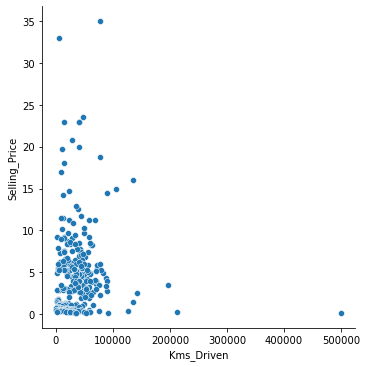

In [23]:
sns.relplot( y = 'Selling_Price', x = 'Kms_Driven',  data = df)

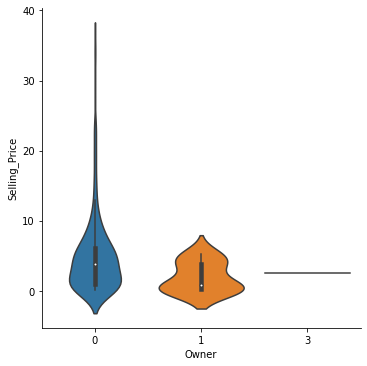

In [24]:
sns.catplot(x='Owner', y ='Selling_Price', kind = 'violin',data= df)

**The maximum car selling prices are between 2-10 lakhs for the cars owned by only 1 individual before. For the cars owned by 2 indiviudals, the price points are less and for the cars owned by 4 individuals is almost null.**

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


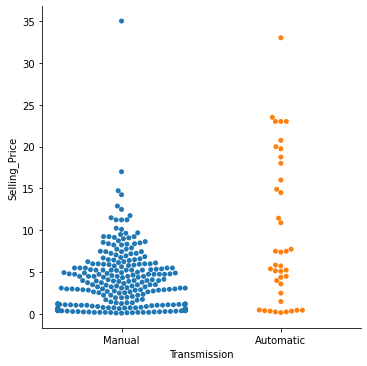

In [26]:
sns.catplot(x='Transmission', y ='Selling_Price', kind = 'swarm',data= df)

**The number of manual cars are sold the most.**

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


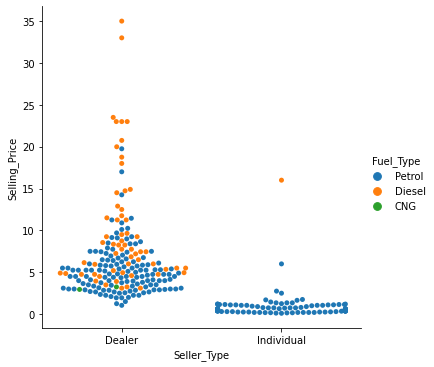

In [27]:
sns.catplot(x='Seller_Type', y ='Selling_Price', kind = 'swarm',data= df,hue = 'Fuel_Type')

**The petrol cars are the highest number, followed by Diesel cars and then comes CNG cars fetching the lowest selling price point**

C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.0% of the points cannot be place

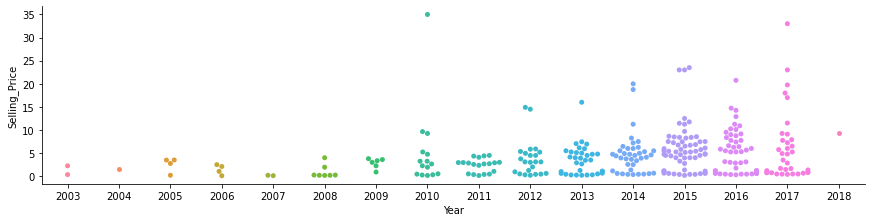

In [36]:
sns.catplot(x='Year', y ='Selling_Price', kind = 'swarm',height=3, aspect=4, data= df)

In [38]:
correlation = df.corr()

<AxesSubplot:>

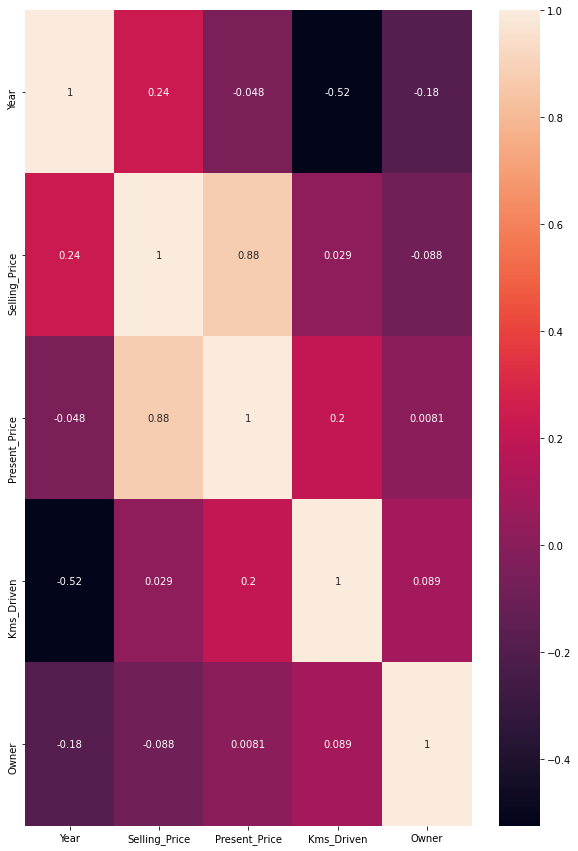

In [39]:
plt.subplots(figsize=(10,15))
sns.heatmap(correlation, annot = True)

**`This gives us a heatmap of the numeric features against each other. You can see from the plot that ->`**

* **'Selling_Price'** and **'Year'** has **0.24** correlation factor which means that as the cars that are recently bought fetches more selling price.
* **'Selling_Price'** and **'Present_Price'** has **0.88** correlation factor which is the highest among all factors and this is close to +1 which means that as the Present_Price increases, the 'Selling_Price' increases at almost the same sharp rate.
* **'Selling_Price'** and **'kms_driven'** have **0.029** correlation factor which is almost equal to 0 which shows the relationship between them can be dropped.
* **'Selling_Price'** and **'Owner'** have **-.088** which is also almost equal to 0 which means there isn't much of a relationship between them.

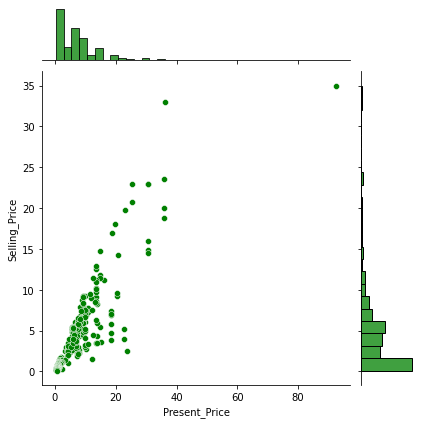

In [41]:
sns.jointplot(x = 'Present_Price', y ='Selling_Price', data=df, color = 'Green')

This shows a bar plot as well as scatter plot for both the values. The bar plot tells the maximum 'Selling_Price' is at what points and similarly for 'Present_Price'

Graphically represents the numeric factors of all features amongst each other.


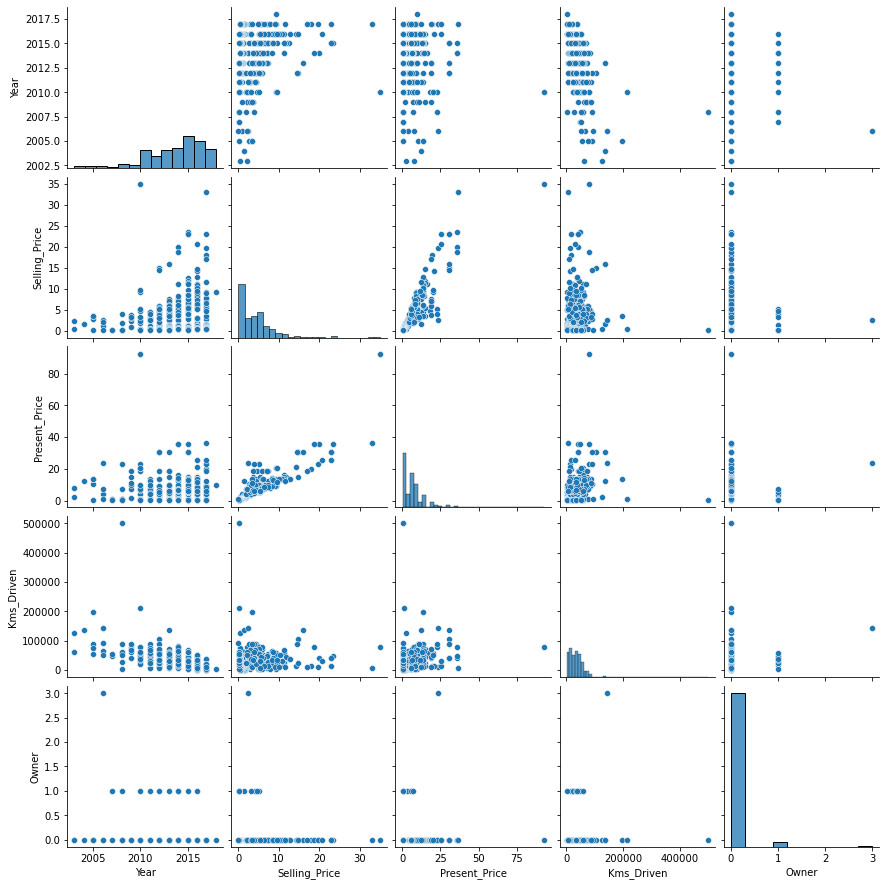

In [42]:
sns.pairplot(data = df)

## Creating Dummy Features
The string values have to be changed to Numeric values to be included in the algorithm as string values cannot be regarded. This is achieved by creating dummy values for the features having String values.

In [44]:
dummy1 = pd.get_dummies(df.Fuel_Type)
dummy2 = pd.get_dummies(df.Seller_Type)
dummy3 = pd.get_dummies(df.Transmission)

The new features are merged onto the original dataset

In [46]:
merge = pd.concat([df,dummy1,dummy2,dummy3], axis = 'columns')

In [47]:
final = merge.drop(['Car_Name','Fuel_Type','Seller_Type','Transmission','CNG','Individual','Automatic','Owner','Kms_Driven'], axis = 'columns')

I have dropped the Fuel_type, Seller_Type and Transmission columns from the dataset. This is because I have created dummy variables for them. Moreover, I have also dropped one each type of value for the newly created dummy variables. This is because the value becomes redundant. This can be explained as, if the Diesel value is 0 and the petrol value is also 0, this automatically means that the feature for CNG is 1 for that row. Similarly,this is true for rest of the dummy features.

In [48]:
final

,Year,Selling_Price,Present_Price,Diesel,Petrol,Dealer,Manual
0,2014,3.35,5.59,0,1,1,1
1,2013,4.75,9.54,1,0,1,1
2,2017,7.25,9.85,0,1,1,1
3,2011,2.85,4.15,0,1,1,1
4,2014,4.60,6.87,1,0,1,1
...,...,...,...,...,...,...,...
296,2016,9.50,11.60,1,0,1,1
297,2015,4.00,5.90,0,1,1,1
298,2009,3.35,11.00,0,1,1,1
299,2017,11.50,12.50,1,0,1,1


## Linear Regression

X denotes all the features except "Selling_Price"

In [50]:
X = final.drop(['Selling_Price'],axis = 'columns')

y denotes the 'Selling_Price'

In [51]:
y = final['Selling_Price']

The test size and train size is 20 to 80

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state = 20)

In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [54]:
model.fit(X_train,y_train)

LinearRegression()

In [55]:
model.score(X_test,y_test)

0.9202235710743033

**The accuracy is 0.92 for my model. If I change the random_state, the accuracy also changes. This is applicable for all models.**